In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

import warnings
warnings.filterwarnings('ignore')

In [8]:
covid=pd.read_csv("C:\\Users\\91888\\OneDrive\\Desktop\\covid.csv")

In [10]:
print(covid.info)

<bound method DataFrame.info of         location        date         variant  num_sequences  perc_sequences  \
0         Angola  2020-07-06           Alpha              0             0.0   
1         Angola  2020-07-06       B.1.1.277              0             0.0   
2         Angola  2020-07-06       B.1.1.302              0             0.0   
3         Angola  2020-07-06       B.1.1.519              0             0.0   
4         Angola  2020-07-06         B.1.160              0             0.0   
...          ...         ...             ...            ...             ...   
100411  Zimbabwe  2021-11-01         Omicron              0             0.0   
100412  Zimbabwe  2021-11-01   S:677H.Robin1              0             0.0   
100413  Zimbabwe  2021-11-01  S:677P.Pelican              0             0.0   
100414  Zimbabwe  2021-11-01          others              0             0.0   
100415  Zimbabwe  2021-11-01         non_who              0             0.0   

        num_sequenc

In [12]:
covid.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [14]:
covid['variant'].astype('category').value_counts()

Alpha             4184
B.1.1.277         4184
non_who           4184
S:677P.Pelican    4184
S:677H.Robin1     4184
Omicron           4184
Mu                4184
Lambda            4184
Kappa             4184
Iota              4184
Gamma             4184
Eta               4184
Epsilon           4184
Delta             4184
Beta              4184
B.1.620           4184
B.1.367           4184
B.1.258           4184
B.1.221           4184
B.1.177           4184
B.1.160           4184
B.1.1.519         4184
B.1.1.302         4184
others            4184
Name: variant, dtype: int64

In [15]:
covid["num_sequences"].astype('category').value_counts()

0         84173
1          2753
2          1405
3           905
4           631
          ...  
1290          1
1295          1
1296          1
1297          1
142280        1
Name: num_sequences, Length: 1563, dtype: int64

In [16]:
covid['num_sequences_total'].astype('category').value_counts()

1         4920
2         3624
3         2712
4         2256
5         2040
          ... 
1135        24
1137        24
1142        24
1143        24
146170      24
Name: num_sequences_total, Length: 1247, dtype: int64

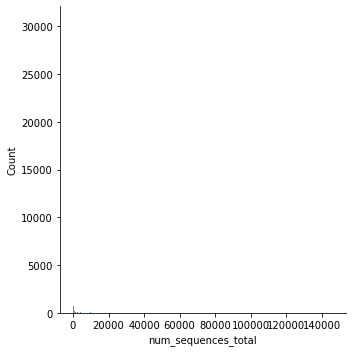

In [18]:
sns.displot(covid['num_sequences_total'])

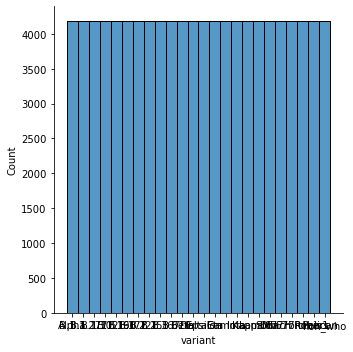

In [21]:
sns.displot(covid["variant"])

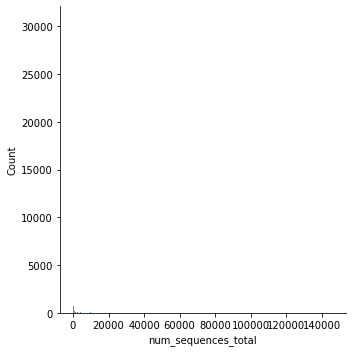

In [22]:
sns.displot(covid['num_sequences_total'])

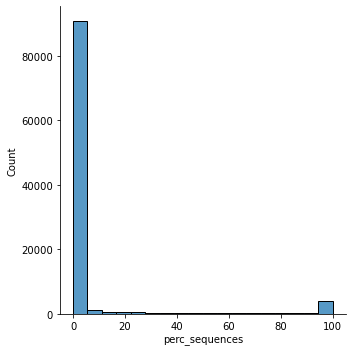

In [23]:
sns.displot(covid["perc_sequences"])

In [26]:
covid=covid.select_dtypes(include=['float64','int64'])
covid.head()

,num_sequences,perc_sequences,num_sequences_total
0,0,0.0,3
1,0,0.0,3
2,0,0.0,3
3,0,0.0,3
4,0,0.0,3


<Figure size 1440x720 with 0 Axes>

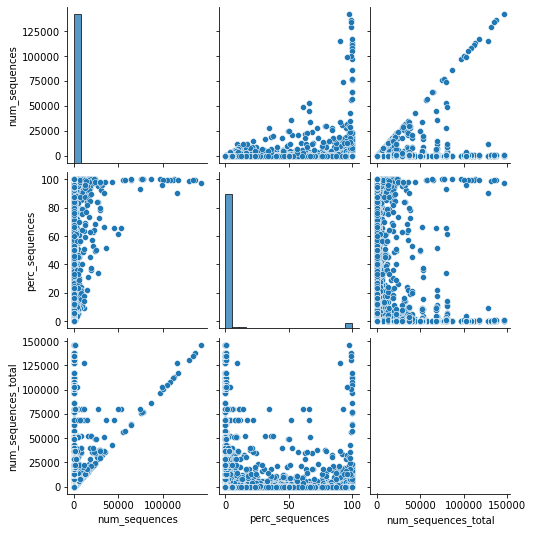

In [27]:
plt.figure(figsize=(20,10))
sns.pairplot(covid)
plt.show()

In [28]:
cor=covid.corr()
cor

,num_sequences,perc_sequences,num_sequences_total
num_sequences,1.000000,0.147368,0.219677
perc_sequences,0.147368,1.000000,-0.011211
num_sequences_total,0.219677,-0.011211,1.000000


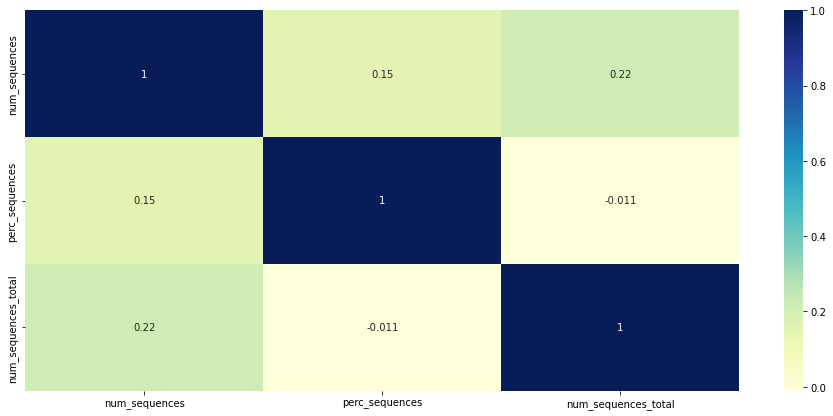

In [34]:
plt.figure(figsize=(16,7))
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

In [35]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   num_sequences        100416 non-null  int64  
 1   perc_sequences       100416 non-null  float64
 2   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 MB
